# Notebook to interactively manipulate equilibrium boundary and getting corresponding MXH coefficients

In [17]:
using FUSE
using Plots; gr();
using IMAS

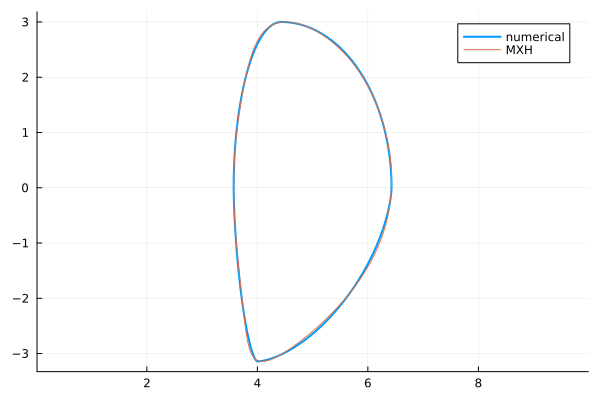

R0: 5.000065273504402
Z0: -0.07142857142857162
ϵ: 0.2856975013179829
κ: 2.1500982411129073
c0: 0.10876312953902538
c: [0.08032429966912842, -0.06887113017492369, -0.01899444873586966, -0.0027389319794995943]
s: [0.46310593537589834, 0.0495164473899583, -0.055817107528508006, 0.011596523885830245]


In [18]:
mhx_order = 4

R0 = 5.0
eps = 1/3.5
a = R0*eps
kapu = 2.10
kapl = 2.20
delu = 0.4
dell = 0.7
zetaou = 0.0
zetaol = -0.2
zetaiu = -0.0
zetail = -0.2
upnull = false
lonull = false

r, z, zref = try
    IMAS.boundary_shape(; a, eps, kapu, kapl, delu, dell, zetaou, zetaiu, zetaol, zetail, zoffset=0.0, upnull, lonull)
catch e
    [NaN], [NaN], [NaN]
end

mxh = IMAS.MXH(r, z, mhx_order)
plot(r, z; aspect_ratio=:equal, lw=2, label="numerical")
display(plot!(mxh,label="MXH"))
display(mxh)

In [19]:
mxh_vect = IMAS.flat_coeffs(mxh)

13-element Vector{Float64}:
  5.000065273504402
 -0.07142857142857162
  0.2856975013179829
  2.1500982411129073
  0.10876312953902538
  0.08032429966912842
 -0.06887113017492369
 -0.01899444873586966
 -0.0027389319794995943
  0.46310593537589834
  0.0495164473899583
 -0.055817107528508006
  0.011596523885830245

In [20]:
# TEQUILA deadstart MXH
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini.equilibrium.boundary_from = :MXH_params
ini.equilibrium.MXH_params = mxh_vect
ini.equilibrium

act.ActorEquilibrium

ActorEquilibrium{Float64}
├─ model ➡ :Solovev Equilibrium actor to run [:Solovev, :CHEASE, :TEQUILA]
├─ symmetrize ➡ false Force equilibrium up-down symmetry with respect to magnetic axis
└─ do_plot ➡ false Plot before and after actor


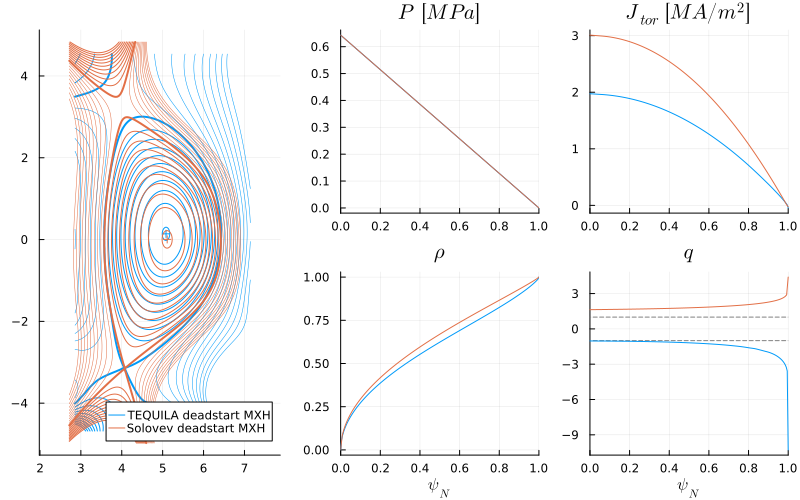

In [21]:
dd = IMAS.dd()
act.ActorEquilibrium.model = :TEQUILA
d = FUSE.init(dd, ini, act)
mxh_plot = plot(dd.equilibrium, label="TEQUILA deadstart MXH")

dd = IMAS.dd()
act.ActorEquilibrium.model = :Solovev
d = FUSE.init(dd, ini, act)
plot!(mxh_plot,dd.equilibrium, label="Solovev deadstart MXH")

display(mxh_plot)